In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics


In [7]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

In [5]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe()

In [5]:
df.isnull().sum() #Checking for null records

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
x=pd.DataFrame(df.iloc[:,2])
y=pd.DataFrame(df.iloc[:,-1])

In [7]:
x

,Age
0,19
1,21
2,20
3,23
4,31
...,...
195,35
196,45
197,32
198,32


In [8]:
y

,Spending_Score
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [9]:
cols = df.iloc[:, [2,4]].values

In [10]:
cols

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

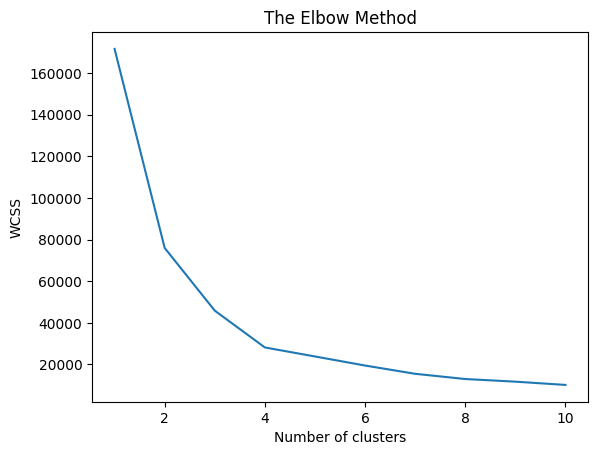

In [12]:
import warnings
warnings.filterwarnings('ignore')

#Using elbow method to find the optimal number of clusters
cols = df.iloc[:, [2,4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cols)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
from sklearn.cluster import KMeans
#No. of Clusters
kmeans=KMeans(n_clusters=3)

#Fitting the input data
kmeans=kmeans.fit(cols)

#Getting cluster labels
labels=kmeans.predict(cols)

#Centroid values
centroid=kmeans.cluster_centers_
print(centroid)

[[42.95744681 14.59574468]
 [29.56451613 80.74193548]
 [43.05494505 47.78021978]]


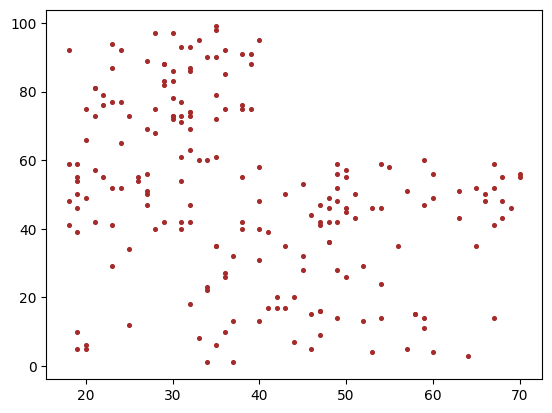

In [14]:
plt.scatter(x.values,y.values,s=7,c='brown')
plt.show()

In [15]:
y_means=kmeans.fit_predict(cols)

In [16]:
y_means

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

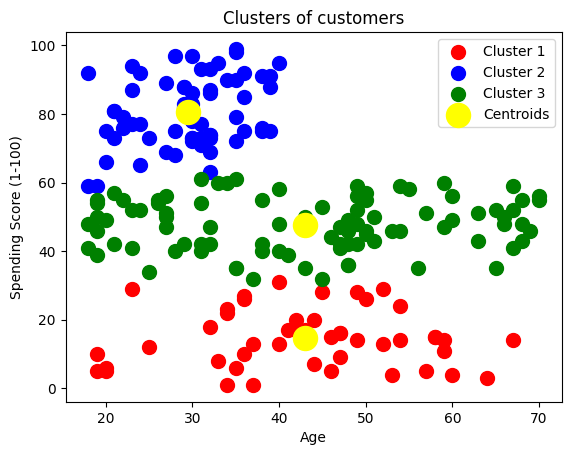

In [17]:
#Visulaizing the clusters
plt.scatter(cols[y_means == 0, 0], cols[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cols[y_means == 1, 0], cols[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cols[y_means == 2, 0], cols[y_means == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


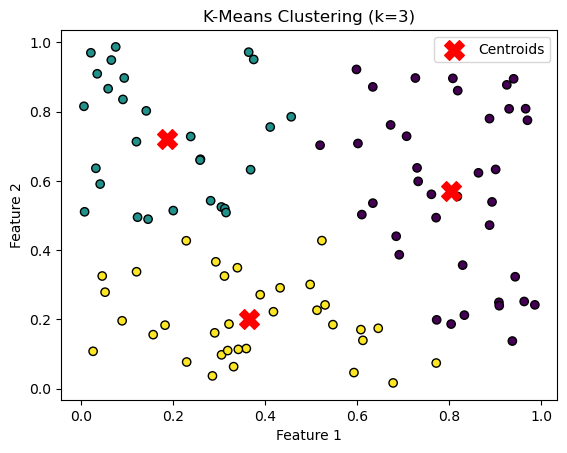

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generating some random data for demonstration
np.random.seed(42)
data = np.random.rand(100, 2)

# Specify the number of clusters (k)
k = 3

# Create KMeans instance
kmeans = KMeans(n_clusters=k)

# Fit the data to the KMeans model
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

# Visualize the data and clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
